In [1]:
import random
import math
import time

# Data

In [3]:
cities1 = {
 1: (9860, 14152), 2: (9396, 14616), 4: (11020, 13456), 6: (10788, 13804),
 7: (10208, 14384), 8: (11600, 13456), 9: (11252, 14036), 11: (11136, 14152),
 12: (9860, 13108), 14: (9512, 13340), 15: (10556, 13688), 16: (9628, 14036),
 17: (10904, 13108), 18: (11368, 12644), 19: (11252, 13340), 20: (10672, 13340),
 21: (11020, 13108), 22: (11020, 13340), 23: (11136, 13572), 24: (11020, 13688),
 25: (8468, 11136), 26: (8932, 12064), 27: (9512, 12412), 28: (7772, 11020),
 29: (8352, 10672), 30: (9164, 12876), 31: (9744, 12528), 32: (8352, 10324),
 33: (8236, 11020), 34: (8468, 12876), 35: (8700, 14036), 36: (8932, 13688),
 37: (9048, 13804), 38: (8468, 12296), 39: (8352, 12644), 40: (8236, 13572),
 41: (9164, 13340), 42: (8004, 12760), 43: (8584, 13108), 51: (9164, 14964),
 67: (12412, 13340), 72: (11484, 13224), 73: (12296, 12760), 74: (12064, 12528),
 77: (11368, 12296), 78: (11136, 11020), 79: (10556, 11948), 80: (10324, 11716),
 97: (5336, 10324), 98: (812, 6264), 105: (10440, 14036), 106: (10672, 13804),
 108: (10788, 13572), 114: (10672, 14152), 122: (8004, 11020), 123: (5684, 11948)
}


cities2 = {
 44: (7772, 14732), 45: (7540, 15080), 46: (7424, 17516), 47: (8352, 17052),
 48: (7540, 16820), 49: (7888, 17168), 53: (7888, 16936), 54: (8236, 15428),
 57: (8700, 15312), 93: (5104, 14616), 94: (6496, 17168), 95: (5684, 13224),
 103: (7308, 14848), 107: (1160, 18560), 111: (5336, 18908), 112: (6264, 19140),
 118: (7656, 17052), 127: (3248, 14152)
}


cities3 = {
 63: (15312, 6612), 68: (12876, 12180), 69: (13688, 10904), 70: (13688, 11716),
 71: (13688, 12528), 75: (12644, 10556), 76: (11832, 11252), 81: (11484, 9512),
 82: (11484, 7540), 83: (11020, 7424), 84: (11484, 9744), 85: (16936, 12180),
 86: (17052, 12064), 87: (16936, 11832), 88: (17052, 11600), 96: (15660, 10788),
 101: (9744, 3132), 102: (10904, 3480), 109: (15660, 11368), 110: (15544, 12760),
 117: (11020, 10208), 119: (16240, 8352), 126: (11484, 8468)
}


cities4 = {
 3: (11252, 14848), 5: (9512, 15776), 10: (10672, 15080), 13: (10092, 14964),
 50: (9744, 15196), 52: (9744, 16240), 55: (9512, 17400), 56: (9164, 16008),
 58: (11716, 16008), 59: (12992, 14964), 60: (12412, 14964), 61: (12296, 15312),
 62: (12528, 15196), 64: (11716, 16124), 65: (11600, 19720), 66: (10324, 17516),
 89: (13804, 18792), 90: (12064, 14964), 91: (12180, 15544), 92: (14152, 18908),
 99: (14384, 20184), 100: (11252, 15776), 104: (16472, 16472), 113: (11832, 17516),
 115: (10208, 15196), 116: (12180, 14848), 120: (10440, 14732), 121: (9164, 15544),
 124: (9512, 16472), 125: (13688, 17516)
}


clusters = [cities1, cities2, cities3, cities4]

# Defy

In [4]:
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Precompute distances between cities for efficiency
def precompute_distances(cities):
    distances = {}
    city_list = list(cities.keys())
    for i in range(len(city_list)):
        for j in range(i + 1, len(city_list)):
            dist = math.sqrt((cities[city_list[i]][0] - cities[city_list[j]][0])**2 + 
                             (cities[city_list[i]][1] - cities[city_list[j]][1])**2)
            distances[(city_list[i], city_list[j])] = dist
            distances[(city_list[j], city_list[i])] = dist
    return distances

# Evaluate the fitness of a tour
def evaluate_tour(tour, distances):
    return sum(distances[(tour[i - 1], tour[i])] for i in range(len(tour)))

# Initialize a population of tours
def initialize_population(size, cities):
    return [random.sample(list(cities.keys()), len(cities)) for _ in range(size)]

# Tournament selection with evaluation caching
def selection(population, fitness_scores, elite):
    new_population = [elite]  # Start with the elite
    for _ in range(len(population) - 1):
        contenders = random.choices(population, k=5)
        best = min(contenders, key=lambda x: fitness_scores[id(x)])
        new_population.append(best)
    return new_population

# PMX crossover suitable for TSP
def pmx_crossover(parent1, parent2):
    length = len(parent1)
    slice_point1, slice_point2 = sorted(random.sample(range(length), 2))
    middle_cut = parent1[slice_point1:slice_point2]
    child = [None] * length
    child[slice_point1:slice_point2] = middle_cut
    gene_map = {parent1[i]: parent2[i] for i in range(slice_point1, slice_point2)}
    for i in range(length):
        if not (slice_point1 <= i < slice_point2):
            gene = parent2[i]
            while gene in gene_map:
                gene = gene_map[gene]
            child[i] = gene
    return child

# Mutate a tour by swapping two cities
def mutate(tour, mutation_rate):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
    return tour

# Genetic algorithm with elitism and a stopping condition based on convergence
def genetic_algorithm(cities, population_size, mutation_rate, max_no_improvement):
    distances = precompute_distances(cities)
    population = initialize_population(population_size, cities)
    fitness_scores = {id(tour): evaluate_tour(tour, distances) for tour in population}
    best_tour = min(population, key=lambda x: fitness_scores[id(x)])
    best_score = fitness_scores[id(best_tour)]

    no_improvement_count = 0

    while no_improvement_count < max_no_improvement:
        population = selection(population, fitness_scores, best_tour)
        new_population = []

        for i in range(0, population_size, 2):
            parent1, parent2 = population[i], population[i+1]
            child1, child2 = pmx_crossover(parent1, parent2), pmx_crossover(parent2, parent1)
            new_population.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])

        fitness_scores = {id(tour): evaluate_tour(tour, distances) for tour in new_population}
        population = new_population
        current_best = min(population, key=lambda x: fitness_scores[id(x)])
        current_score = fitness_scores[id(current_best)]

        if current_score < best_score:
            best_tour, best_score = current_best, current_score
            no_improvement_count = 0  # Reset the counter on improvement
        else:
            no_improvement_count += 1  # Increment the counter if no improvement

    return best_tour, best_score

# Funkcja do obliczania długości trasy
def calculate_tour_length(tour, cities):
    total_distance = 0
    for i in range(1, len(tour)):
        total_distance += distance(cities[tour[i-1]], cities[tour[i]])
    # Dodaj odległość powrotu do pierwszego miasta, aby zamknąć trasę
    total_distance += distance(cities[tour[-1]], cities[tour[0]])
    return total_distance

# Kod

In [7]:
# Rozpoczęcie pomiaru czasu dla całego procesu
start_time = time.time()

# Rozwiązanie dla każdego klastra osobno
clusters = [cities1, cities2, cities3, cities4]
all_tours = []
for cluster in clusters:
    best_tour, best_score = genetic_algorithm(cluster, 1000, 0.05, 50)
    all_tours.append(best_tour)

# Łączenie tras z różnych klastrów w jedną
overall_tour = all_tours[0]
for i in range(1, len(all_tours)):
    # Znajdź najbliższe miasta między końcem jednej trasy a początkiem następnej
    end_city = overall_tour[-1]
    start_city = min(all_tours[i], key=lambda city: distance(clusters[i-1][end_city], clusters[i][city]))
    # Aby uniknąć duplikacji miast, pomiń pierwsze miasto następnej trasy
    overall_tour.extend(all_tours[i][all_tours[i].index(start_city):])
    overall_tour.extend(all_tours[i][:all_tours[i].index(start_city)])

# Zamknij trasę, łącząc ostatnie miasto z pierwszym
overall_tour.append(overall_tour[0])

# Oblicz długość overall_tour
# Zakładamy, że wszystkie punkty z różnych klastrów zostały połączone w jedną dużą listę słowników cities_combined
cities_combined = {**cities1, **cities2, **cities3, **cities4}
overall_tour_length = calculate_tour_length(overall_tour, cities_combined)

# Koniec pomiaru czasu
end_time = time.time()


In [8]:
# Wyświetlanie wyników
print("Overall tour:", overall_tour)
print("Overall tour length:", overall_tour_length)
print("Elapsed time: {:.2f} seconds".format(end_time - start_time))

Overall tour: [14, 41, 36, 43, 34, 39, 38, 25, 33, 122, 32, 29, 26, 40, 35, 51, 2, 7, 114, 11, 9, 24, 23, 22, 21, 17, 20, 6, 106, 105, 1, 16, 37, 42, 123, 98, 97, 28, 30, 12, 15, 108, 4, 19, 72, 8, 67, 73, 74, 18, 77, 78, 79, 80, 27, 31, 44, 54, 57, 47, 49, 53, 48, 118, 46, 94, 112, 111, 107, 127, 93, 95, 103, 45, 76, 75, 69, 70, 68, 71, 110, 109, 96, 85, 86, 87, 88, 119, 63, 102, 101, 83, 82, 126, 81, 84, 117, 120, 10, 100, 64, 58, 91, 61, 3, 90, 116, 60, 62, 59, 104, 125, 89, 92, 99, 65, 113, 66, 55, 124, 52, 5, 56, 121, 50, 115, 13, 14]
Overall tour length: 145618.7026182355
Elapsed time: 12.71 seconds


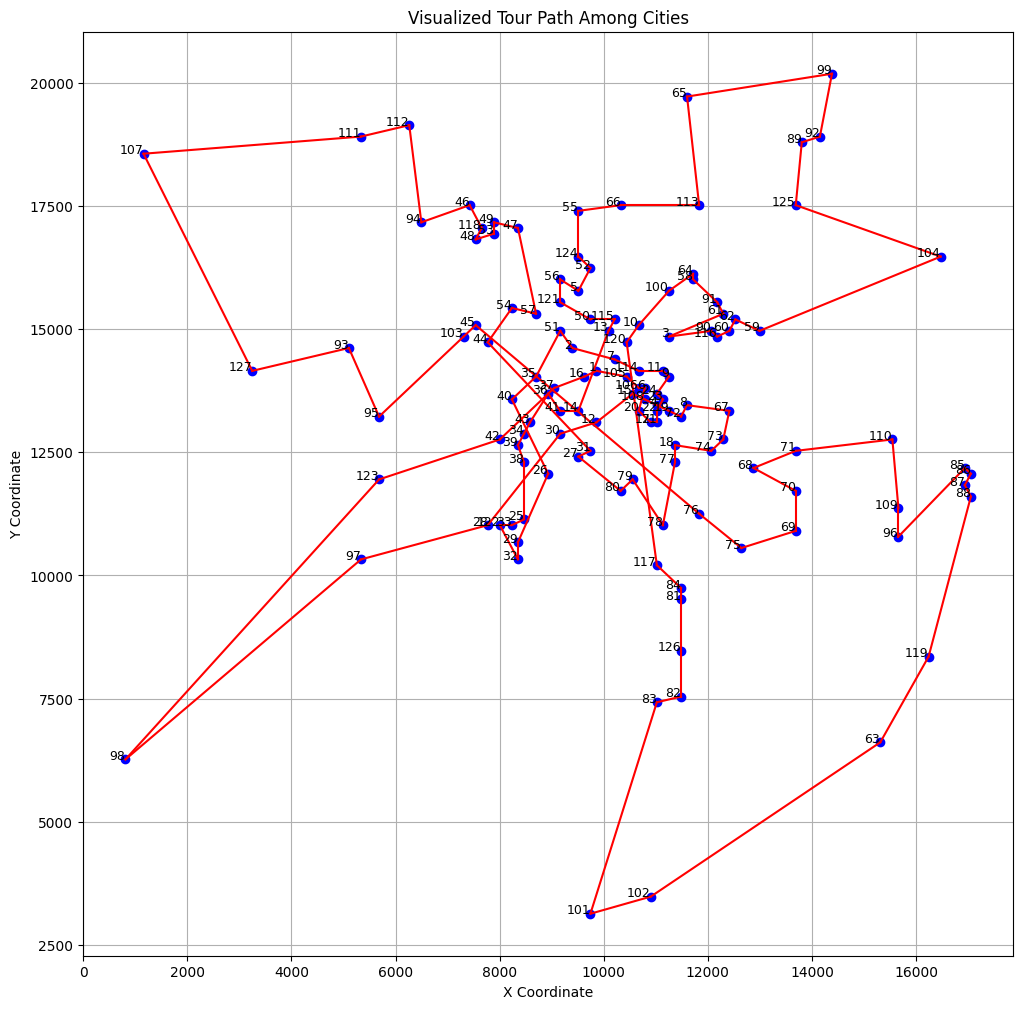

In [9]:
import matplotlib.pyplot as plt

# Combine all cities into one dictionary
all_cities = {**cities1, **cities2, **cities3, **cities4}

# Define the tour across all clusters
tour = [14, 41, 36, 43, 34, 39, 38, 25, 33, 122, 32, 29, 26, 40, 35, 51, 2, 7, 114, 11, 9, 24, 23, 22, 21, 17, 20, 6, 106, 105, 1, 16, 37, 42, 123, 98, 97, 28, 30, 12, 15, 108, 4, 19, 72, 8, 67, 73, 74, 18, 77, 78, 79, 80, 27, 31, 44, 54, 57, 47, 49, 53, 48, 118, 46, 94, 112, 111, 107, 127, 93, 95, 103, 45, 76, 75, 69, 70, 68, 71, 110, 109, 96, 85, 86, 87, 88, 119, 63, 102, 101, 83, 82, 126, 81, 84, 117, 120, 10, 100, 64, 58, 91, 61, 3, 90, 116, 60, 62, 59, 104, 125, 89, 92, 99, 65, 113, 66, 55, 124, 52, 5, 56, 121, 50, 115, 13, 14]

# Plotting the cities and the tour
fig, ax = plt.subplots(figsize=(12, 12))

# Extract coordinates for the tour
tour_coordinates = [all_cities[city] for city in tour]

# Plot each city as a point
for city_index, (x, y) in all_cities.items():
    ax.plot(x, y, 'bo')  # blue dot for each city
    ax.text(x, y, str(city_index), fontsize=9, ha='right')

# Draw lines between cities according to the tour
for i in range(len(tour_coordinates) - 1):
    x0, y0 = tour_coordinates[i]
    x1, y1 = tour_coordinates[i + 1]
    ax.plot([x0, x1], [y0, y1], 'r-')  # red line for the tour path

# Setting labels and grid
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Visualized Tour Path Among Cities')
ax.grid(True)


plt.savefig('GA-kmeans-bier127.png')
# Show the completed plot
plt.show()